In [1]:
import torch
import torchvision

tabu1 = []
tabu2 = []

n_epochs = 80
batch_size_train = 512
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 1

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [57]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.FashionMNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.FashionMNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [58]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [2]:

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('./cifar10_dataset', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.CIFAR10('./cifar10_dataset', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_test, shuffle=True)

print(train_loader)
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)


Files already downloaded and verified
Files already downloaded and verified
torch.Size([512, 3, 32, 32])


In [3]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='train', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='test', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [4]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)



In [5]:
train_size = int(0.8 * len(train_loader.dataset))
test_size = len(train_loader.dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_loader.dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test,
                                                shuffle=False)

In [6]:
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in train_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

train_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])
test_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])

print(mean)
print(std)

tensor([0.4909, 0.4817, 0.4463])
tensor([0.2024, 0.1995, 0.2010])


In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
       
        # define the layers and their sizes, turn off bias
        self.fc1 = nn.Linear(3072, 3072)
        self.d1 = nn.Dropout(0.3) #MyLinear(1024, 1024, 0.5, tabu1) # #      
        
        #self.d2 = nn.Dropout(0.5)
        #self.dT = MyLinear(1024, 1024, 0.5, tabu2) 
        self.fc2 = nn.Linear(3072, 1024)
        self.d2 = nn.Dropout(0.2) 
        self.fc3 = nn.Linear(1024, 1024)
        
        #For CIFAR-10
        #self.d3 = Dropout(0.3) 
        #self.fc3_1 = nn.Linear(512, 256)
        
        self.fc4 = nn.Linear(1024, 10)
        

    def forward(self, x):
        x = x.view(-1, 3072)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.d1(x))
        #x = F.relu(self.dT(x))
        x = F.relu(self.fc2(x))
        
        x = F.relu(self.d2(x))
        x = F.relu(self.fc3(x))
        
        # for CIFAR-10
        #x = F.relu(self.d3(x))
        #x = F.relu(self.fc3_1(x))
        x = self.fc4(x)
        return F.log_softmax(x)

In [8]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

In [9]:
avg_train_loss = []
avg_train_counter = []
avg_test_loss = []
avg_test_counter = []
test_accuracy_list = []

test_losses = []
test_counter = []

epoch_number = 0
train_avg_loss = 0
test_avg_loss = 0

In [10]:
def train(epoch):
  
    train_losses = []
    train_counter = []
    
    network.train()
    firstBatch = True
    for batch_idx, (data, target) in enumerate(train_loader):

        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            #torch.save(network.state_dict(), './results/cifar10_with_dropout_model.pth')
            #torch.save(optimizer.state_dict(), './results/cifar10_with_dropout_optimizer.pth')
            
    sum = 0.0
    for loss in train_losses:
        sum = sum + loss
    
    avg_train_loss.append(sum / len(train_losses))
    print("Average Training Loss: " + str(sum / len(train_losses)))

In [11]:
def test(epoch):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
        #iterator = iter(test_loader)
        #data, target= iterator.next() 
        
            examples = enumerate(val_loader)
            batch_idx, (example_data, example_targets) = next(examples)  
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(val_loader.dataset)
    avg_test_loss.append(test_loss)
    test_counter.append((batch_idx*64) + ((epoch-1)*len(val_loader.dataset)))
    test_accuracy_list.append(100. * correct / len(val_loader.dataset))
    
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))
   

In [12]:
#test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test(epoch)

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/40000 (0%)]	Loss: 2.301569
Train Epoch: 1 [512/40000 (1%)]	Loss: 2.302884
Train Epoch: 1 [1024/40000 (3%)]	Loss: 2.300728
Train Epoch: 1 [1536/40000 (4%)]	Loss: 2.301268
Train Epoch: 1 [2048/40000 (5%)]	Loss: 2.301261
Train Epoch: 1 [2560/40000 (6%)]	Loss: 2.300101
Train Epoch: 1 [3072/40000 (8%)]	Loss: 2.302678
Train Epoch: 1 [3584/40000 (9%)]	Loss: 2.302513
Train Epoch: 1 [4096/40000 (10%)]	Loss: 2.304521
Train Epoch: 1 [4608/40000 (11%)]	Loss: 2.301269
Train Epoch: 1 [5120/40000 (13%)]	Loss: 2.302524
Train Epoch: 1 [5632/40000 (14%)]	Loss: 2.302345
Train Epoch: 1 [6144/40000 (15%)]	Loss: 2.300877
Train Epoch: 1 [6656/40000 (16%)]	Loss: 2.302377
Train Epoch: 1 [7168/40000 (18%)]	Loss: 2.298257
Train Epoch: 1 [7680/40000 (19%)]	Loss: 2.300824
Train Epoch: 1 [8192/40000 (20%)]	Loss: 2.302052
Train Epoch: 1 [8704/40000 (22%)]	Loss: 2.300506
Train Epoch: 1 [9216/40000 (23%)]	Loss: 2.301126
Train Epoch: 1 [9728/40000 (24%)]	Loss: 2.302272
Train Epoch: 1 [10240/40000 (25%

/home/akash/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Avg. loss: 2.2939, Accuracy: 1279/10000 (12%)

Train Epoch: 2 [0/40000 (0%)]	Loss: 2.298686
Train Epoch: 2 [512/40000 (1%)]	Loss: 2.294988
Train Epoch: 2 [1024/40000 (3%)]	Loss: 2.295662
Train Epoch: 2 [1536/40000 (4%)]	Loss: 2.296363
Train Epoch: 2 [2048/40000 (5%)]	Loss: 2.295679
Train Epoch: 2 [2560/40000 (6%)]	Loss: 2.296275
Train Epoch: 2 [3072/40000 (8%)]	Loss: 2.298324
Train Epoch: 2 [3584/40000 (9%)]	Loss: 2.295828
Train Epoch: 2 [4096/40000 (10%)]	Loss: 2.295062
Train Epoch: 2 [4608/40000 (11%)]	Loss: 2.296144
Train Epoch: 2 [5120/40000 (13%)]	Loss: 2.294392
Train Epoch: 2 [5632/40000 (14%)]	Loss: 2.293167
Train Epoch: 2 [6144/40000 (15%)]	Loss: 2.294895
Train Epoch: 2 [6656/40000 (16%)]	Loss: 2.291806
Train Epoch: 2 [7168/40000 (18%)]	Loss: 2.295099
Train Epoch: 2 [7680/40000 (19%)]	Loss: 2.293669
Train Epoch: 2 [8192/40000 (20%)]	Loss: 2.292447
Train Epoch: 2 [8704/40000 (22%)]	Loss: 2.296972
Train Epoch: 2 [9216/40000 (23%)]	Loss: 2.292862
Train Epoch: 2 [9728/400

Train Epoch: 4 [1536/40000 (4%)]	Loss: 2.275870
Train Epoch: 4 [2048/40000 (5%)]	Loss: 2.278416
Train Epoch: 4 [2560/40000 (6%)]	Loss: 2.277035
Train Epoch: 4 [3072/40000 (8%)]	Loss: 2.277605
Train Epoch: 4 [3584/40000 (9%)]	Loss: 2.275986
Train Epoch: 4 [4096/40000 (10%)]	Loss: 2.276868
Train Epoch: 4 [4608/40000 (11%)]	Loss: 2.276665
Train Epoch: 4 [5120/40000 (13%)]	Loss: 2.272747
Train Epoch: 4 [5632/40000 (14%)]	Loss: 2.281333
Train Epoch: 4 [6144/40000 (15%)]	Loss: 2.277347
Train Epoch: 4 [6656/40000 (16%)]	Loss: 2.277411
Train Epoch: 4 [7168/40000 (18%)]	Loss: 2.272242
Train Epoch: 4 [7680/40000 (19%)]	Loss: 2.283271
Train Epoch: 4 [8192/40000 (20%)]	Loss: 2.273791
Train Epoch: 4 [8704/40000 (22%)]	Loss: 2.274403
Train Epoch: 4 [9216/40000 (23%)]	Loss: 2.276195
Train Epoch: 4 [9728/40000 (24%)]	Loss: 2.275522
Train Epoch: 4 [10240/40000 (25%)]	Loss: 2.275594
Train Epoch: 4 [10752/40000 (27%)]	Loss: 2.268947
Train Epoch: 4 [11264/40000 (28%)]	Loss: 2.273641
Train Epoch: 4 [11776/

Train Epoch: 6 [3584/40000 (9%)]	Loss: 2.230037
Train Epoch: 6 [4096/40000 (10%)]	Loss: 2.241937
Train Epoch: 6 [4608/40000 (11%)]	Loss: 2.231632
Train Epoch: 6 [5120/40000 (13%)]	Loss: 2.236109
Train Epoch: 6 [5632/40000 (14%)]	Loss: 2.231492
Train Epoch: 6 [6144/40000 (15%)]	Loss: 2.233283
Train Epoch: 6 [6656/40000 (16%)]	Loss: 2.232983
Train Epoch: 6 [7168/40000 (18%)]	Loss: 2.234023
Train Epoch: 6 [7680/40000 (19%)]	Loss: 2.236836
Train Epoch: 6 [8192/40000 (20%)]	Loss: 2.227503
Train Epoch: 6 [8704/40000 (22%)]	Loss: 2.216702
Train Epoch: 6 [9216/40000 (23%)]	Loss: 2.237776
Train Epoch: 6 [9728/40000 (24%)]	Loss: 2.228971
Train Epoch: 6 [10240/40000 (25%)]	Loss: 2.223838
Train Epoch: 6 [10752/40000 (27%)]	Loss: 2.237839
Train Epoch: 6 [11264/40000 (28%)]	Loss: 2.213250
Train Epoch: 6 [11776/40000 (29%)]	Loss: 2.235452
Train Epoch: 6 [12288/40000 (30%)]	Loss: 2.229626
Train Epoch: 6 [12800/40000 (32%)]	Loss: 2.229287
Train Epoch: 6 [13312/40000 (33%)]	Loss: 2.229604
Train Epoch: 6

Train Epoch: 8 [5632/40000 (14%)]	Loss: 2.135849
Train Epoch: 8 [6144/40000 (15%)]	Loss: 2.166147
Train Epoch: 8 [6656/40000 (16%)]	Loss: 2.153674
Train Epoch: 8 [7168/40000 (18%)]	Loss: 2.128585
Train Epoch: 8 [7680/40000 (19%)]	Loss: 2.149276
Train Epoch: 8 [8192/40000 (20%)]	Loss: 2.154109
Train Epoch: 8 [8704/40000 (22%)]	Loss: 2.146485
Train Epoch: 8 [9216/40000 (23%)]	Loss: 2.155939
Train Epoch: 8 [9728/40000 (24%)]	Loss: 2.147223
Train Epoch: 8 [10240/40000 (25%)]	Loss: 2.164305
Train Epoch: 8 [10752/40000 (27%)]	Loss: 2.136570
Train Epoch: 8 [11264/40000 (28%)]	Loss: 2.173460
Train Epoch: 8 [11776/40000 (29%)]	Loss: 2.128144
Train Epoch: 8 [12288/40000 (30%)]	Loss: 2.165857
Train Epoch: 8 [12800/40000 (32%)]	Loss: 2.121192
Train Epoch: 8 [13312/40000 (33%)]	Loss: 2.124380
Train Epoch: 8 [13824/40000 (34%)]	Loss: 2.156898
Train Epoch: 8 [14336/40000 (35%)]	Loss: 2.136445
Train Epoch: 8 [14848/40000 (37%)]	Loss: 2.147145
Train Epoch: 8 [15360/40000 (38%)]	Loss: 2.171461
Train Epo

Train Epoch: 10 [7680/40000 (19%)]	Loss: 2.060278
Train Epoch: 10 [8192/40000 (20%)]	Loss: 2.085367
Train Epoch: 10 [8704/40000 (22%)]	Loss: 2.096502
Train Epoch: 10 [9216/40000 (23%)]	Loss: 2.059712
Train Epoch: 10 [9728/40000 (24%)]	Loss: 2.055054
Train Epoch: 10 [10240/40000 (25%)]	Loss: 2.064521
Train Epoch: 10 [10752/40000 (27%)]	Loss: 2.098719
Train Epoch: 10 [11264/40000 (28%)]	Loss: 2.060737
Train Epoch: 10 [11776/40000 (29%)]	Loss: 2.049481
Train Epoch: 10 [12288/40000 (30%)]	Loss: 2.042758
Train Epoch: 10 [12800/40000 (32%)]	Loss: 2.076311
Train Epoch: 10 [13312/40000 (33%)]	Loss: 2.116826
Train Epoch: 10 [13824/40000 (34%)]	Loss: 2.083804
Train Epoch: 10 [14336/40000 (35%)]	Loss: 2.075440
Train Epoch: 10 [14848/40000 (37%)]	Loss: 2.091840
Train Epoch: 10 [15360/40000 (38%)]	Loss: 2.049824
Train Epoch: 10 [15872/40000 (39%)]	Loss: 2.077974
Train Epoch: 10 [16384/40000 (41%)]	Loss: 2.058689
Train Epoch: 10 [16896/40000 (42%)]	Loss: 2.071668
Train Epoch: 10 [17408/40000 (43%)]	

Train Epoch: 12 [8192/40000 (20%)]	Loss: 2.040878
Train Epoch: 12 [8704/40000 (22%)]	Loss: 2.035456
Train Epoch: 12 [9216/40000 (23%)]	Loss: 2.064159
Train Epoch: 12 [9728/40000 (24%)]	Loss: 1.998480
Train Epoch: 12 [10240/40000 (25%)]	Loss: 2.006081
Train Epoch: 12 [10752/40000 (27%)]	Loss: 2.048087
Train Epoch: 12 [11264/40000 (28%)]	Loss: 2.057170
Train Epoch: 12 [11776/40000 (29%)]	Loss: 2.039003
Train Epoch: 12 [12288/40000 (30%)]	Loss: 2.011932
Train Epoch: 12 [12800/40000 (32%)]	Loss: 1.984166
Train Epoch: 12 [13312/40000 (33%)]	Loss: 2.021937
Train Epoch: 12 [13824/40000 (34%)]	Loss: 2.056898
Train Epoch: 12 [14336/40000 (35%)]	Loss: 2.005523
Train Epoch: 12 [14848/40000 (37%)]	Loss: 2.046198
Train Epoch: 12 [15360/40000 (38%)]	Loss: 2.060974
Train Epoch: 12 [15872/40000 (39%)]	Loss: 2.020049
Train Epoch: 12 [16384/40000 (41%)]	Loss: 2.004979
Train Epoch: 12 [16896/40000 (42%)]	Loss: 1.976563
Train Epoch: 12 [17408/40000 (43%)]	Loss: 1.994352
Train Epoch: 12 [17920/40000 (44%)]

Train Epoch: 14 [8704/40000 (22%)]	Loss: 2.011415
Train Epoch: 14 [9216/40000 (23%)]	Loss: 1.970756
Train Epoch: 14 [9728/40000 (24%)]	Loss: 2.029615
Train Epoch: 14 [10240/40000 (25%)]	Loss: 2.017277
Train Epoch: 14 [10752/40000 (27%)]	Loss: 1.987059
Train Epoch: 14 [11264/40000 (28%)]	Loss: 2.010883
Train Epoch: 14 [11776/40000 (29%)]	Loss: 1.988760
Train Epoch: 14 [12288/40000 (30%)]	Loss: 1.974232
Train Epoch: 14 [12800/40000 (32%)]	Loss: 2.013323
Train Epoch: 14 [13312/40000 (33%)]	Loss: 1.976239
Train Epoch: 14 [13824/40000 (34%)]	Loss: 1.989824
Train Epoch: 14 [14336/40000 (35%)]	Loss: 1.970701
Train Epoch: 14 [14848/40000 (37%)]	Loss: 1.976744
Train Epoch: 14 [15360/40000 (38%)]	Loss: 1.984876
Train Epoch: 14 [15872/40000 (39%)]	Loss: 1.926445
Train Epoch: 14 [16384/40000 (41%)]	Loss: 2.003493
Train Epoch: 14 [16896/40000 (42%)]	Loss: 2.022137
Train Epoch: 14 [17408/40000 (43%)]	Loss: 1.976649
Train Epoch: 14 [17920/40000 (44%)]	Loss: 1.943660
Train Epoch: 14 [18432/40000 (46%)

Train Epoch: 16 [9216/40000 (23%)]	Loss: 1.933677
Train Epoch: 16 [9728/40000 (24%)]	Loss: 1.968299
Train Epoch: 16 [10240/40000 (25%)]	Loss: 1.935389
Train Epoch: 16 [10752/40000 (27%)]	Loss: 1.993566
Train Epoch: 16 [11264/40000 (28%)]	Loss: 1.944741
Train Epoch: 16 [11776/40000 (29%)]	Loss: 2.017411
Train Epoch: 16 [12288/40000 (30%)]	Loss: 1.999523
Train Epoch: 16 [12800/40000 (32%)]	Loss: 1.960897
Train Epoch: 16 [13312/40000 (33%)]	Loss: 1.974518
Train Epoch: 16 [13824/40000 (34%)]	Loss: 1.942043
Train Epoch: 16 [14336/40000 (35%)]	Loss: 1.965994
Train Epoch: 16 [14848/40000 (37%)]	Loss: 1.933734
Train Epoch: 16 [15360/40000 (38%)]	Loss: 1.943031
Train Epoch: 16 [15872/40000 (39%)]	Loss: 1.915228
Train Epoch: 16 [16384/40000 (41%)]	Loss: 1.957197
Train Epoch: 16 [16896/40000 (42%)]	Loss: 1.927908
Train Epoch: 16 [17408/40000 (43%)]	Loss: 1.915231
Train Epoch: 16 [17920/40000 (44%)]	Loss: 1.916885
Train Epoch: 16 [18432/40000 (46%)]	Loss: 1.916580
Train Epoch: 16 [18944/40000 (47%

Train Epoch: 18 [9728/40000 (24%)]	Loss: 1.943017
Train Epoch: 18 [10240/40000 (25%)]	Loss: 1.894347
Train Epoch: 18 [10752/40000 (27%)]	Loss: 1.927434
Train Epoch: 18 [11264/40000 (28%)]	Loss: 1.861831
Train Epoch: 18 [11776/40000 (29%)]	Loss: 1.916690
Train Epoch: 18 [12288/40000 (30%)]	Loss: 1.899925
Train Epoch: 18 [12800/40000 (32%)]	Loss: 1.953009
Train Epoch: 18 [13312/40000 (33%)]	Loss: 1.915470
Train Epoch: 18 [13824/40000 (34%)]	Loss: 1.926578
Train Epoch: 18 [14336/40000 (35%)]	Loss: 1.911914
Train Epoch: 18 [14848/40000 (37%)]	Loss: 1.940504
Train Epoch: 18 [15360/40000 (38%)]	Loss: 1.949184
Train Epoch: 18 [15872/40000 (39%)]	Loss: 1.956955
Train Epoch: 18 [16384/40000 (41%)]	Loss: 1.961582
Train Epoch: 18 [16896/40000 (42%)]	Loss: 1.915748
Train Epoch: 18 [17408/40000 (43%)]	Loss: 1.944972
Train Epoch: 18 [17920/40000 (44%)]	Loss: 1.876708
Train Epoch: 18 [18432/40000 (46%)]	Loss: 1.951527
Train Epoch: 18 [18944/40000 (47%)]	Loss: 1.921859
Train Epoch: 18 [19456/40000 (48

Train Epoch: 20 [10240/40000 (25%)]	Loss: 1.960629
Train Epoch: 20 [10752/40000 (27%)]	Loss: 1.882535
Train Epoch: 20 [11264/40000 (28%)]	Loss: 1.924661
Train Epoch: 20 [11776/40000 (29%)]	Loss: 1.898353
Train Epoch: 20 [12288/40000 (30%)]	Loss: 1.933182
Train Epoch: 20 [12800/40000 (32%)]	Loss: 1.918569
Train Epoch: 20 [13312/40000 (33%)]	Loss: 1.877337
Train Epoch: 20 [13824/40000 (34%)]	Loss: 1.881343
Train Epoch: 20 [14336/40000 (35%)]	Loss: 1.889146
Train Epoch: 20 [14848/40000 (37%)]	Loss: 1.878613
Train Epoch: 20 [15360/40000 (38%)]	Loss: 1.934277
Train Epoch: 20 [15872/40000 (39%)]	Loss: 1.909516
Train Epoch: 20 [16384/40000 (41%)]	Loss: 1.955960
Train Epoch: 20 [16896/40000 (42%)]	Loss: 1.881073
Train Epoch: 20 [17408/40000 (43%)]	Loss: 1.936414
Train Epoch: 20 [17920/40000 (44%)]	Loss: 1.925673
Train Epoch: 20 [18432/40000 (46%)]	Loss: 1.887817
Train Epoch: 20 [18944/40000 (47%)]	Loss: 1.940714
Train Epoch: 20 [19456/40000 (48%)]	Loss: 1.893872
Train Epoch: 20 [19968/40000 (4

Train Epoch: 22 [10752/40000 (27%)]	Loss: 1.892646
Train Epoch: 22 [11264/40000 (28%)]	Loss: 1.868534
Train Epoch: 22 [11776/40000 (29%)]	Loss: 1.905877
Train Epoch: 22 [12288/40000 (30%)]	Loss: 1.870049
Train Epoch: 22 [12800/40000 (32%)]	Loss: 1.880326
Train Epoch: 22 [13312/40000 (33%)]	Loss: 1.917597
Train Epoch: 22 [13824/40000 (34%)]	Loss: 1.831774
Train Epoch: 22 [14336/40000 (35%)]	Loss: 1.860955
Train Epoch: 22 [14848/40000 (37%)]	Loss: 1.884623
Train Epoch: 22 [15360/40000 (38%)]	Loss: 1.935507
Train Epoch: 22 [15872/40000 (39%)]	Loss: 1.897852
Train Epoch: 22 [16384/40000 (41%)]	Loss: 1.877024
Train Epoch: 22 [16896/40000 (42%)]	Loss: 1.947479
Train Epoch: 22 [17408/40000 (43%)]	Loss: 1.913069
Train Epoch: 22 [17920/40000 (44%)]	Loss: 1.930010
Train Epoch: 22 [18432/40000 (46%)]	Loss: 1.882418
Train Epoch: 22 [18944/40000 (47%)]	Loss: 1.885679
Train Epoch: 22 [19456/40000 (48%)]	Loss: 1.927182
Train Epoch: 22 [19968/40000 (49%)]	Loss: 1.897515
Train Epoch: 22 [20480/40000 (5

Train Epoch: 24 [11264/40000 (28%)]	Loss: 1.845019
Train Epoch: 24 [11776/40000 (29%)]	Loss: 1.868941
Train Epoch: 24 [12288/40000 (30%)]	Loss: 1.905991
Train Epoch: 24 [12800/40000 (32%)]	Loss: 1.834993
Train Epoch: 24 [13312/40000 (33%)]	Loss: 1.856416
Train Epoch: 24 [13824/40000 (34%)]	Loss: 1.899057
Train Epoch: 24 [14336/40000 (35%)]	Loss: 1.836614
Train Epoch: 24 [14848/40000 (37%)]	Loss: 1.846851
Train Epoch: 24 [15360/40000 (38%)]	Loss: 1.812492
Train Epoch: 24 [15872/40000 (39%)]	Loss: 1.880903
Train Epoch: 24 [16384/40000 (41%)]	Loss: 1.855162
Train Epoch: 24 [16896/40000 (42%)]	Loss: 1.876296
Train Epoch: 24 [17408/40000 (43%)]	Loss: 1.857420
Train Epoch: 24 [17920/40000 (44%)]	Loss: 1.852727
Train Epoch: 24 [18432/40000 (46%)]	Loss: 1.832113
Train Epoch: 24 [18944/40000 (47%)]	Loss: 1.859437
Train Epoch: 24 [19456/40000 (48%)]	Loss: 1.865819
Train Epoch: 24 [19968/40000 (49%)]	Loss: 1.858496
Train Epoch: 24 [20480/40000 (51%)]	Loss: 1.856154
Train Epoch: 24 [20992/40000 (5

Train Epoch: 26 [11776/40000 (29%)]	Loss: 1.816037
Train Epoch: 26 [12288/40000 (30%)]	Loss: 1.855369
Train Epoch: 26 [12800/40000 (32%)]	Loss: 1.823908
Train Epoch: 26 [13312/40000 (33%)]	Loss: 1.806264
Train Epoch: 26 [13824/40000 (34%)]	Loss: 1.838009
Train Epoch: 26 [14336/40000 (35%)]	Loss: 1.850943
Train Epoch: 26 [14848/40000 (37%)]	Loss: 1.828863
Train Epoch: 26 [15360/40000 (38%)]	Loss: 1.781468
Train Epoch: 26 [15872/40000 (39%)]	Loss: 1.839411
Train Epoch: 26 [16384/40000 (41%)]	Loss: 1.800981
Train Epoch: 26 [16896/40000 (42%)]	Loss: 1.795114
Train Epoch: 26 [17408/40000 (43%)]	Loss: 1.855271
Train Epoch: 26 [17920/40000 (44%)]	Loss: 1.889689
Train Epoch: 26 [18432/40000 (46%)]	Loss: 1.819212
Train Epoch: 26 [18944/40000 (47%)]	Loss: 1.855491
Train Epoch: 26 [19456/40000 (48%)]	Loss: 1.812065
Train Epoch: 26 [19968/40000 (49%)]	Loss: 1.824671
Train Epoch: 26 [20480/40000 (51%)]	Loss: 1.879991
Train Epoch: 26 [20992/40000 (52%)]	Loss: 1.818621
Train Epoch: 26 [21504/40000 (5

Train Epoch: 28 [12288/40000 (30%)]	Loss: 1.783110
Train Epoch: 28 [12800/40000 (32%)]	Loss: 1.775887
Train Epoch: 28 [13312/40000 (33%)]	Loss: 1.821398
Train Epoch: 28 [13824/40000 (34%)]	Loss: 1.881905
Train Epoch: 28 [14336/40000 (35%)]	Loss: 1.820859
Train Epoch: 28 [14848/40000 (37%)]	Loss: 1.845621
Train Epoch: 28 [15360/40000 (38%)]	Loss: 1.754406
Train Epoch: 28 [15872/40000 (39%)]	Loss: 1.818528
Train Epoch: 28 [16384/40000 (41%)]	Loss: 1.818567
Train Epoch: 28 [16896/40000 (42%)]	Loss: 1.841305
Train Epoch: 28 [17408/40000 (43%)]	Loss: 1.778632
Train Epoch: 28 [17920/40000 (44%)]	Loss: 1.833802
Train Epoch: 28 [18432/40000 (46%)]	Loss: 1.778869
Train Epoch: 28 [18944/40000 (47%)]	Loss: 1.867432
Train Epoch: 28 [19456/40000 (48%)]	Loss: 1.826606
Train Epoch: 28 [19968/40000 (49%)]	Loss: 1.805180
Train Epoch: 28 [20480/40000 (51%)]	Loss: 1.867476
Train Epoch: 28 [20992/40000 (52%)]	Loss: 1.886406
Train Epoch: 28 [21504/40000 (53%)]	Loss: 1.873576
Train Epoch: 28 [22016/40000 (5

Train Epoch: 30 [12800/40000 (32%)]	Loss: 1.779012
Train Epoch: 30 [13312/40000 (33%)]	Loss: 1.797933
Train Epoch: 30 [13824/40000 (34%)]	Loss: 1.810544
Train Epoch: 30 [14336/40000 (35%)]	Loss: 1.888443
Train Epoch: 30 [14848/40000 (37%)]	Loss: 1.828012
Train Epoch: 30 [15360/40000 (38%)]	Loss: 1.808981
Train Epoch: 30 [15872/40000 (39%)]	Loss: 1.803953
Train Epoch: 30 [16384/40000 (41%)]	Loss: 1.801876
Train Epoch: 30 [16896/40000 (42%)]	Loss: 1.786518
Train Epoch: 30 [17408/40000 (43%)]	Loss: 1.824640
Train Epoch: 30 [17920/40000 (44%)]	Loss: 1.785258
Train Epoch: 30 [18432/40000 (46%)]	Loss: 1.823450
Train Epoch: 30 [18944/40000 (47%)]	Loss: 1.808303
Train Epoch: 30 [19456/40000 (48%)]	Loss: 1.774063
Train Epoch: 30 [19968/40000 (49%)]	Loss: 1.856722
Train Epoch: 30 [20480/40000 (51%)]	Loss: 1.816439
Train Epoch: 30 [20992/40000 (52%)]	Loss: 1.761636
Train Epoch: 30 [21504/40000 (53%)]	Loss: 1.888791
Train Epoch: 30 [22016/40000 (54%)]	Loss: 1.816261
Train Epoch: 30 [22528/40000 (5

Train Epoch: 32 [13312/40000 (33%)]	Loss: 1.763656
Train Epoch: 32 [13824/40000 (34%)]	Loss: 1.753784
Train Epoch: 32 [14336/40000 (35%)]	Loss: 1.843624
Train Epoch: 32 [14848/40000 (37%)]	Loss: 1.838552
Train Epoch: 32 [15360/40000 (38%)]	Loss: 1.828039
Train Epoch: 32 [15872/40000 (39%)]	Loss: 1.832915
Train Epoch: 32 [16384/40000 (41%)]	Loss: 1.821419
Train Epoch: 32 [16896/40000 (42%)]	Loss: 1.861750
Train Epoch: 32 [17408/40000 (43%)]	Loss: 1.759727
Train Epoch: 32 [17920/40000 (44%)]	Loss: 1.802339
Train Epoch: 32 [18432/40000 (46%)]	Loss: 1.844835
Train Epoch: 32 [18944/40000 (47%)]	Loss: 1.810316
Train Epoch: 32 [19456/40000 (48%)]	Loss: 1.741594
Train Epoch: 32 [19968/40000 (49%)]	Loss: 1.710155
Train Epoch: 32 [20480/40000 (51%)]	Loss: 1.729315
Train Epoch: 32 [20992/40000 (52%)]	Loss: 1.862111
Train Epoch: 32 [21504/40000 (53%)]	Loss: 1.772677
Train Epoch: 32 [22016/40000 (54%)]	Loss: 1.782841
Train Epoch: 32 [22528/40000 (56%)]	Loss: 1.814857
Train Epoch: 32 [23040/40000 (5

Train Epoch: 34 [13824/40000 (34%)]	Loss: 1.779511
Train Epoch: 34 [14336/40000 (35%)]	Loss: 1.753057
Train Epoch: 34 [14848/40000 (37%)]	Loss: 1.753201
Train Epoch: 34 [15360/40000 (38%)]	Loss: 1.739311
Train Epoch: 34 [15872/40000 (39%)]	Loss: 1.798497
Train Epoch: 34 [16384/40000 (41%)]	Loss: 1.742838
Train Epoch: 34 [16896/40000 (42%)]	Loss: 1.825098
Train Epoch: 34 [17408/40000 (43%)]	Loss: 1.763513
Train Epoch: 34 [17920/40000 (44%)]	Loss: 1.828412
Train Epoch: 34 [18432/40000 (46%)]	Loss: 1.805441
Train Epoch: 34 [18944/40000 (47%)]	Loss: 1.757185
Train Epoch: 34 [19456/40000 (48%)]	Loss: 1.779316
Train Epoch: 34 [19968/40000 (49%)]	Loss: 1.774450
Train Epoch: 34 [20480/40000 (51%)]	Loss: 1.775325
Train Epoch: 34 [20992/40000 (52%)]	Loss: 1.821581
Train Epoch: 34 [21504/40000 (53%)]	Loss: 1.797686
Train Epoch: 34 [22016/40000 (54%)]	Loss: 1.786058
Train Epoch: 34 [22528/40000 (56%)]	Loss: 1.748952
Train Epoch: 34 [23040/40000 (57%)]	Loss: 1.804897
Train Epoch: 34 [23552/40000 (5

Train Epoch: 36 [14336/40000 (35%)]	Loss: 1.744990
Train Epoch: 36 [14848/40000 (37%)]	Loss: 1.792066
Train Epoch: 36 [15360/40000 (38%)]	Loss: 1.786516
Train Epoch: 36 [15872/40000 (39%)]	Loss: 1.811326
Train Epoch: 36 [16384/40000 (41%)]	Loss: 1.770939
Train Epoch: 36 [16896/40000 (42%)]	Loss: 1.758052
Train Epoch: 36 [17408/40000 (43%)]	Loss: 1.674555
Train Epoch: 36 [17920/40000 (44%)]	Loss: 1.776570
Train Epoch: 36 [18432/40000 (46%)]	Loss: 1.821774
Train Epoch: 36 [18944/40000 (47%)]	Loss: 1.827042
Train Epoch: 36 [19456/40000 (48%)]	Loss: 1.796288
Train Epoch: 36 [19968/40000 (49%)]	Loss: 1.778364
Train Epoch: 36 [20480/40000 (51%)]	Loss: 1.769463
Train Epoch: 36 [20992/40000 (52%)]	Loss: 1.667190
Train Epoch: 36 [21504/40000 (53%)]	Loss: 1.757539
Train Epoch: 36 [22016/40000 (54%)]	Loss: 1.743026
Train Epoch: 36 [22528/40000 (56%)]	Loss: 1.733750
Train Epoch: 36 [23040/40000 (57%)]	Loss: 1.793189
Train Epoch: 36 [23552/40000 (58%)]	Loss: 1.769383
Train Epoch: 36 [24064/40000 (5

Train Epoch: 38 [14848/40000 (37%)]	Loss: 1.769868
Train Epoch: 38 [15360/40000 (38%)]	Loss: 1.776150
Train Epoch: 38 [15872/40000 (39%)]	Loss: 1.783182
Train Epoch: 38 [16384/40000 (41%)]	Loss: 1.719178
Train Epoch: 38 [16896/40000 (42%)]	Loss: 1.780236
Train Epoch: 38 [17408/40000 (43%)]	Loss: 1.721913
Train Epoch: 38 [17920/40000 (44%)]	Loss: 1.731401
Train Epoch: 38 [18432/40000 (46%)]	Loss: 1.728354
Train Epoch: 38 [18944/40000 (47%)]	Loss: 1.782824
Train Epoch: 38 [19456/40000 (48%)]	Loss: 1.761564
Train Epoch: 38 [19968/40000 (49%)]	Loss: 1.800240
Train Epoch: 38 [20480/40000 (51%)]	Loss: 1.757108
Train Epoch: 38 [20992/40000 (52%)]	Loss: 1.759772
Train Epoch: 38 [21504/40000 (53%)]	Loss: 1.763801
Train Epoch: 38 [22016/40000 (54%)]	Loss: 1.817791
Train Epoch: 38 [22528/40000 (56%)]	Loss: 1.776779
Train Epoch: 38 [23040/40000 (57%)]	Loss: 1.720196
Train Epoch: 38 [23552/40000 (58%)]	Loss: 1.762506
Train Epoch: 38 [24064/40000 (59%)]	Loss: 1.745037
Train Epoch: 38 [24576/40000 (6

Train Epoch: 40 [15360/40000 (38%)]	Loss: 1.708025
Train Epoch: 40 [15872/40000 (39%)]	Loss: 1.756866
Train Epoch: 40 [16384/40000 (41%)]	Loss: 1.721388
Train Epoch: 40 [16896/40000 (42%)]	Loss: 1.697841
Train Epoch: 40 [17408/40000 (43%)]	Loss: 1.738472
Train Epoch: 40 [17920/40000 (44%)]	Loss: 1.663760
Train Epoch: 40 [18432/40000 (46%)]	Loss: 1.733044
Train Epoch: 40 [18944/40000 (47%)]	Loss: 1.816211
Train Epoch: 40 [19456/40000 (48%)]	Loss: 1.760609
Train Epoch: 40 [19968/40000 (49%)]	Loss: 1.733436
Train Epoch: 40 [20480/40000 (51%)]	Loss: 1.687090
Train Epoch: 40 [20992/40000 (52%)]	Loss: 1.714403
Train Epoch: 40 [21504/40000 (53%)]	Loss: 1.736042
Train Epoch: 40 [22016/40000 (54%)]	Loss: 1.707628
Train Epoch: 40 [22528/40000 (56%)]	Loss: 1.730536
Train Epoch: 40 [23040/40000 (57%)]	Loss: 1.709392
Train Epoch: 40 [23552/40000 (58%)]	Loss: 1.754829
Train Epoch: 40 [24064/40000 (59%)]	Loss: 1.711977
Train Epoch: 40 [24576/40000 (61%)]	Loss: 1.678900
Train Epoch: 40 [25088/40000 (6

Train Epoch: 42 [15872/40000 (39%)]	Loss: 1.671702
Train Epoch: 42 [16384/40000 (41%)]	Loss: 1.722452
Train Epoch: 42 [16896/40000 (42%)]	Loss: 1.737942
Train Epoch: 42 [17408/40000 (43%)]	Loss: 1.694949
Train Epoch: 42 [17920/40000 (44%)]	Loss: 1.742436
Train Epoch: 42 [18432/40000 (46%)]	Loss: 1.772577
Train Epoch: 42 [18944/40000 (47%)]	Loss: 1.792472
Train Epoch: 42 [19456/40000 (48%)]	Loss: 1.693840
Train Epoch: 42 [19968/40000 (49%)]	Loss: 1.715926
Train Epoch: 42 [20480/40000 (51%)]	Loss: 1.718299
Train Epoch: 42 [20992/40000 (52%)]	Loss: 1.760855
Train Epoch: 42 [21504/40000 (53%)]	Loss: 1.673458
Train Epoch: 42 [22016/40000 (54%)]	Loss: 1.674429
Train Epoch: 42 [22528/40000 (56%)]	Loss: 1.754231
Train Epoch: 42 [23040/40000 (57%)]	Loss: 1.682762
Train Epoch: 42 [23552/40000 (58%)]	Loss: 1.759237
Train Epoch: 42 [24064/40000 (59%)]	Loss: 1.683695
Train Epoch: 42 [24576/40000 (61%)]	Loss: 1.721311
Train Epoch: 42 [25088/40000 (62%)]	Loss: 1.680462
Train Epoch: 42 [25600/40000 (6

Train Epoch: 44 [16384/40000 (41%)]	Loss: 1.639046
Train Epoch: 44 [16896/40000 (42%)]	Loss: 1.670429
Train Epoch: 44 [17408/40000 (43%)]	Loss: 1.712374
Train Epoch: 44 [17920/40000 (44%)]	Loss: 1.676287
Train Epoch: 44 [18432/40000 (46%)]	Loss: 1.609106
Train Epoch: 44 [18944/40000 (47%)]	Loss: 1.725406
Train Epoch: 44 [19456/40000 (48%)]	Loss: 1.690093
Train Epoch: 44 [19968/40000 (49%)]	Loss: 1.794478
Train Epoch: 44 [20480/40000 (51%)]	Loss: 1.677881
Train Epoch: 44 [20992/40000 (52%)]	Loss: 1.671252
Train Epoch: 44 [21504/40000 (53%)]	Loss: 1.743608
Train Epoch: 44 [22016/40000 (54%)]	Loss: 1.666319
Train Epoch: 44 [22528/40000 (56%)]	Loss: 1.724415
Train Epoch: 44 [23040/40000 (57%)]	Loss: 1.731506
Train Epoch: 44 [23552/40000 (58%)]	Loss: 1.704695
Train Epoch: 44 [24064/40000 (59%)]	Loss: 1.707680
Train Epoch: 44 [24576/40000 (61%)]	Loss: 1.720332
Train Epoch: 44 [25088/40000 (62%)]	Loss: 1.688347
Train Epoch: 44 [25600/40000 (63%)]	Loss: 1.779636
Train Epoch: 44 [26112/40000 (6

Train Epoch: 46 [16896/40000 (42%)]	Loss: 1.645199
Train Epoch: 46 [17408/40000 (43%)]	Loss: 1.646554
Train Epoch: 46 [17920/40000 (44%)]	Loss: 1.673837
Train Epoch: 46 [18432/40000 (46%)]	Loss: 1.658346
Train Epoch: 46 [18944/40000 (47%)]	Loss: 1.631060
Train Epoch: 46 [19456/40000 (48%)]	Loss: 1.715703
Train Epoch: 46 [19968/40000 (49%)]	Loss: 1.677303
Train Epoch: 46 [20480/40000 (51%)]	Loss: 1.628302
Train Epoch: 46 [20992/40000 (52%)]	Loss: 1.705286
Train Epoch: 46 [21504/40000 (53%)]	Loss: 1.659535
Train Epoch: 46 [22016/40000 (54%)]	Loss: 1.683275
Train Epoch: 46 [22528/40000 (56%)]	Loss: 1.676199
Train Epoch: 46 [23040/40000 (57%)]	Loss: 1.732842
Train Epoch: 46 [23552/40000 (58%)]	Loss: 1.648564
Train Epoch: 46 [24064/40000 (59%)]	Loss: 1.659954
Train Epoch: 46 [24576/40000 (61%)]	Loss: 1.639633
Train Epoch: 46 [25088/40000 (62%)]	Loss: 1.665373
Train Epoch: 46 [25600/40000 (63%)]	Loss: 1.747226
Train Epoch: 46 [26112/40000 (65%)]	Loss: 1.712306
Train Epoch: 46 [26624/40000 (6

Train Epoch: 48 [17408/40000 (43%)]	Loss: 1.774182
Train Epoch: 48 [17920/40000 (44%)]	Loss: 1.627374
Train Epoch: 48 [18432/40000 (46%)]	Loss: 1.713063
Train Epoch: 48 [18944/40000 (47%)]	Loss: 1.722760
Train Epoch: 48 [19456/40000 (48%)]	Loss: 1.667108
Train Epoch: 48 [19968/40000 (49%)]	Loss: 1.741925
Train Epoch: 48 [20480/40000 (51%)]	Loss: 1.683120
Train Epoch: 48 [20992/40000 (52%)]	Loss: 1.730354
Train Epoch: 48 [21504/40000 (53%)]	Loss: 1.663127
Train Epoch: 48 [22016/40000 (54%)]	Loss: 1.639510
Train Epoch: 48 [22528/40000 (56%)]	Loss: 1.689962
Train Epoch: 48 [23040/40000 (57%)]	Loss: 1.689108
Train Epoch: 48 [23552/40000 (58%)]	Loss: 1.678263
Train Epoch: 48 [24064/40000 (59%)]	Loss: 1.780801
Train Epoch: 48 [24576/40000 (61%)]	Loss: 1.677553
Train Epoch: 48 [25088/40000 (62%)]	Loss: 1.671712
Train Epoch: 48 [25600/40000 (63%)]	Loss: 1.694266
Train Epoch: 48 [26112/40000 (65%)]	Loss: 1.652931
Train Epoch: 48 [26624/40000 (66%)]	Loss: 1.734788
Train Epoch: 48 [27136/40000 (6

Train Epoch: 50 [17920/40000 (44%)]	Loss: 1.652693
Train Epoch: 50 [18432/40000 (46%)]	Loss: 1.724465
Train Epoch: 50 [18944/40000 (47%)]	Loss: 1.607227
Train Epoch: 50 [19456/40000 (48%)]	Loss: 1.659151
Train Epoch: 50 [19968/40000 (49%)]	Loss: 1.663359
Train Epoch: 50 [20480/40000 (51%)]	Loss: 1.604273
Train Epoch: 50 [20992/40000 (52%)]	Loss: 1.627689
Train Epoch: 50 [21504/40000 (53%)]	Loss: 1.569461
Train Epoch: 50 [22016/40000 (54%)]	Loss: 1.686982
Train Epoch: 50 [22528/40000 (56%)]	Loss: 1.673185
Train Epoch: 50 [23040/40000 (57%)]	Loss: 1.711765
Train Epoch: 50 [23552/40000 (58%)]	Loss: 1.616767
Train Epoch: 50 [24064/40000 (59%)]	Loss: 1.662953
Train Epoch: 50 [24576/40000 (61%)]	Loss: 1.718815
Train Epoch: 50 [25088/40000 (62%)]	Loss: 1.675212
Train Epoch: 50 [25600/40000 (63%)]	Loss: 1.583753
Train Epoch: 50 [26112/40000 (65%)]	Loss: 1.741446
Train Epoch: 50 [26624/40000 (66%)]	Loss: 1.696930
Train Epoch: 50 [27136/40000 (67%)]	Loss: 1.690896
Train Epoch: 50 [27648/40000 (6

Train Epoch: 52 [18432/40000 (46%)]	Loss: 1.660789
Train Epoch: 52 [18944/40000 (47%)]	Loss: 1.623365
Train Epoch: 52 [19456/40000 (48%)]	Loss: 1.635260
Train Epoch: 52 [19968/40000 (49%)]	Loss: 1.651809
Train Epoch: 52 [20480/40000 (51%)]	Loss: 1.634704
Train Epoch: 52 [20992/40000 (52%)]	Loss: 1.615496
Train Epoch: 52 [21504/40000 (53%)]	Loss: 1.672084
Train Epoch: 52 [22016/40000 (54%)]	Loss: 1.600311
Train Epoch: 52 [22528/40000 (56%)]	Loss: 1.670490
Train Epoch: 52 [23040/40000 (57%)]	Loss: 1.611802
Train Epoch: 52 [23552/40000 (58%)]	Loss: 1.595111
Train Epoch: 52 [24064/40000 (59%)]	Loss: 1.679670
Train Epoch: 52 [24576/40000 (61%)]	Loss: 1.568531
Train Epoch: 52 [25088/40000 (62%)]	Loss: 1.688596
Train Epoch: 52 [25600/40000 (63%)]	Loss: 1.680017
Train Epoch: 52 [26112/40000 (65%)]	Loss: 1.672240
Train Epoch: 52 [26624/40000 (66%)]	Loss: 1.700968
Train Epoch: 52 [27136/40000 (67%)]	Loss: 1.634730
Train Epoch: 52 [27648/40000 (68%)]	Loss: 1.604473
Train Epoch: 52 [28160/40000 (7

Train Epoch: 54 [18944/40000 (47%)]	Loss: 1.738147
Train Epoch: 54 [19456/40000 (48%)]	Loss: 1.632379
Train Epoch: 54 [19968/40000 (49%)]	Loss: 1.652155
Train Epoch: 54 [20480/40000 (51%)]	Loss: 1.670480
Train Epoch: 54 [20992/40000 (52%)]	Loss: 1.669428
Train Epoch: 54 [21504/40000 (53%)]	Loss: 1.630915
Train Epoch: 54 [22016/40000 (54%)]	Loss: 1.707127
Train Epoch: 54 [22528/40000 (56%)]	Loss: 1.630186
Train Epoch: 54 [23040/40000 (57%)]	Loss: 1.672013
Train Epoch: 54 [23552/40000 (58%)]	Loss: 1.625167
Train Epoch: 54 [24064/40000 (59%)]	Loss: 1.607659
Train Epoch: 54 [24576/40000 (61%)]	Loss: 1.650726
Train Epoch: 54 [25088/40000 (62%)]	Loss: 1.680145
Train Epoch: 54 [25600/40000 (63%)]	Loss: 1.593176
Train Epoch: 54 [26112/40000 (65%)]	Loss: 1.647690
Train Epoch: 54 [26624/40000 (66%)]	Loss: 1.544094
Train Epoch: 54 [27136/40000 (67%)]	Loss: 1.602623
Train Epoch: 54 [27648/40000 (68%)]	Loss: 1.617020
Train Epoch: 54 [28160/40000 (70%)]	Loss: 1.659132
Train Epoch: 54 [28672/40000 (7

Train Epoch: 56 [19456/40000 (48%)]	Loss: 1.700991
Train Epoch: 56 [19968/40000 (49%)]	Loss: 1.624329
Train Epoch: 56 [20480/40000 (51%)]	Loss: 1.657767
Train Epoch: 56 [20992/40000 (52%)]	Loss: 1.602075
Train Epoch: 56 [21504/40000 (53%)]	Loss: 1.577062
Train Epoch: 56 [22016/40000 (54%)]	Loss: 1.623655
Train Epoch: 56 [22528/40000 (56%)]	Loss: 1.650689
Train Epoch: 56 [23040/40000 (57%)]	Loss: 1.610021
Train Epoch: 56 [23552/40000 (58%)]	Loss: 1.678458
Train Epoch: 56 [24064/40000 (59%)]	Loss: 1.665429
Train Epoch: 56 [24576/40000 (61%)]	Loss: 1.638142
Train Epoch: 56 [25088/40000 (62%)]	Loss: 1.662097
Train Epoch: 56 [25600/40000 (63%)]	Loss: 1.635076
Train Epoch: 56 [26112/40000 (65%)]	Loss: 1.666510
Train Epoch: 56 [26624/40000 (66%)]	Loss: 1.623484
Train Epoch: 56 [27136/40000 (67%)]	Loss: 1.592843
Train Epoch: 56 [27648/40000 (68%)]	Loss: 1.602350
Train Epoch: 56 [28160/40000 (70%)]	Loss: 1.540795
Train Epoch: 56 [28672/40000 (71%)]	Loss: 1.619936
Train Epoch: 56 [29184/40000 (7

Train Epoch: 58 [19968/40000 (49%)]	Loss: 1.573112
Train Epoch: 58 [20480/40000 (51%)]	Loss: 1.655273
Train Epoch: 58 [20992/40000 (52%)]	Loss: 1.545136
Train Epoch: 58 [21504/40000 (53%)]	Loss: 1.594043
Train Epoch: 58 [22016/40000 (54%)]	Loss: 1.678853
Train Epoch: 58 [22528/40000 (56%)]	Loss: 1.623376
Train Epoch: 58 [23040/40000 (57%)]	Loss: 1.655246
Train Epoch: 58 [23552/40000 (58%)]	Loss: 1.607384
Train Epoch: 58 [24064/40000 (59%)]	Loss: 1.584817
Train Epoch: 58 [24576/40000 (61%)]	Loss: 1.634431
Train Epoch: 58 [25088/40000 (62%)]	Loss: 1.693474
Train Epoch: 58 [25600/40000 (63%)]	Loss: 1.574696
Train Epoch: 58 [26112/40000 (65%)]	Loss: 1.559692
Train Epoch: 58 [26624/40000 (66%)]	Loss: 1.623851
Train Epoch: 58 [27136/40000 (67%)]	Loss: 1.643000
Train Epoch: 58 [27648/40000 (68%)]	Loss: 1.487111
Train Epoch: 58 [28160/40000 (70%)]	Loss: 1.661983
Train Epoch: 58 [28672/40000 (71%)]	Loss: 1.606849
Train Epoch: 58 [29184/40000 (72%)]	Loss: 1.683671
Train Epoch: 58 [29696/40000 (7

Train Epoch: 60 [20480/40000 (51%)]	Loss: 1.618879
Train Epoch: 60 [20992/40000 (52%)]	Loss: 1.617427
Train Epoch: 60 [21504/40000 (53%)]	Loss: 1.586157
Train Epoch: 60 [22016/40000 (54%)]	Loss: 1.588113
Train Epoch: 60 [22528/40000 (56%)]	Loss: 1.614983
Train Epoch: 60 [23040/40000 (57%)]	Loss: 1.562641
Train Epoch: 60 [23552/40000 (58%)]	Loss: 1.624985
Train Epoch: 60 [24064/40000 (59%)]	Loss: 1.631781
Train Epoch: 60 [24576/40000 (61%)]	Loss: 1.609947
Train Epoch: 60 [25088/40000 (62%)]	Loss: 1.625208
Train Epoch: 60 [25600/40000 (63%)]	Loss: 1.614778
Train Epoch: 60 [26112/40000 (65%)]	Loss: 1.583890
Train Epoch: 60 [26624/40000 (66%)]	Loss: 1.686137
Train Epoch: 60 [27136/40000 (67%)]	Loss: 1.572929
Train Epoch: 60 [27648/40000 (68%)]	Loss: 1.585908
Train Epoch: 60 [28160/40000 (70%)]	Loss: 1.594305
Train Epoch: 60 [28672/40000 (71%)]	Loss: 1.591763
Train Epoch: 60 [29184/40000 (72%)]	Loss: 1.621101
Train Epoch: 60 [29696/40000 (73%)]	Loss: 1.579436
Train Epoch: 60 [30208/40000 (7

Train Epoch: 62 [20992/40000 (52%)]	Loss: 1.672860
Train Epoch: 62 [21504/40000 (53%)]	Loss: 1.664785
Train Epoch: 62 [22016/40000 (54%)]	Loss: 1.602584
Train Epoch: 62 [22528/40000 (56%)]	Loss: 1.621661
Train Epoch: 62 [23040/40000 (57%)]	Loss: 1.575751
Train Epoch: 62 [23552/40000 (58%)]	Loss: 1.599091
Train Epoch: 62 [24064/40000 (59%)]	Loss: 1.581964
Train Epoch: 62 [24576/40000 (61%)]	Loss: 1.677867
Train Epoch: 62 [25088/40000 (62%)]	Loss: 1.493108
Train Epoch: 62 [25600/40000 (63%)]	Loss: 1.516445
Train Epoch: 62 [26112/40000 (65%)]	Loss: 1.558053
Train Epoch: 62 [26624/40000 (66%)]	Loss: 1.634844
Train Epoch: 62 [27136/40000 (67%)]	Loss: 1.577494
Train Epoch: 62 [27648/40000 (68%)]	Loss: 1.606817
Train Epoch: 62 [28160/40000 (70%)]	Loss: 1.619928
Train Epoch: 62 [28672/40000 (71%)]	Loss: 1.618942
Train Epoch: 62 [29184/40000 (72%)]	Loss: 1.589848
Train Epoch: 62 [29696/40000 (73%)]	Loss: 1.644076
Train Epoch: 62 [30208/40000 (75%)]	Loss: 1.530081
Train Epoch: 62 [30720/40000 (7

Train Epoch: 64 [21504/40000 (53%)]	Loss: 1.557936
Train Epoch: 64 [22016/40000 (54%)]	Loss: 1.606155
Train Epoch: 64 [22528/40000 (56%)]	Loss: 1.619169
Train Epoch: 64 [23040/40000 (57%)]	Loss: 1.577484
Train Epoch: 64 [23552/40000 (58%)]	Loss: 1.572245
Train Epoch: 64 [24064/40000 (59%)]	Loss: 1.619460
Train Epoch: 64 [24576/40000 (61%)]	Loss: 1.595722
Train Epoch: 64 [25088/40000 (62%)]	Loss: 1.597201
Train Epoch: 64 [25600/40000 (63%)]	Loss: 1.522468
Train Epoch: 64 [26112/40000 (65%)]	Loss: 1.555996
Train Epoch: 64 [26624/40000 (66%)]	Loss: 1.561251
Train Epoch: 64 [27136/40000 (67%)]	Loss: 1.585378
Train Epoch: 64 [27648/40000 (68%)]	Loss: 1.647413
Train Epoch: 64 [28160/40000 (70%)]	Loss: 1.500102
Train Epoch: 64 [28672/40000 (71%)]	Loss: 1.587822
Train Epoch: 64 [29184/40000 (72%)]	Loss: 1.518343
Train Epoch: 64 [29696/40000 (73%)]	Loss: 1.613322
Train Epoch: 64 [30208/40000 (75%)]	Loss: 1.589822
Train Epoch: 64 [30720/40000 (76%)]	Loss: 1.647927
Train Epoch: 64 [31232/40000 (7

Train Epoch: 66 [22016/40000 (54%)]	Loss: 1.588250
Train Epoch: 66 [22528/40000 (56%)]	Loss: 1.610673
Train Epoch: 66 [23040/40000 (57%)]	Loss: 1.566763
Train Epoch: 66 [23552/40000 (58%)]	Loss: 1.604543
Train Epoch: 66 [24064/40000 (59%)]	Loss: 1.593224
Train Epoch: 66 [24576/40000 (61%)]	Loss: 1.581055
Train Epoch: 66 [25088/40000 (62%)]	Loss: 1.586091
Train Epoch: 66 [25600/40000 (63%)]	Loss: 1.572572
Train Epoch: 66 [26112/40000 (65%)]	Loss: 1.634609
Train Epoch: 66 [26624/40000 (66%)]	Loss: 1.572872
Train Epoch: 66 [27136/40000 (67%)]	Loss: 1.581937
Train Epoch: 66 [27648/40000 (68%)]	Loss: 1.517952
Train Epoch: 66 [28160/40000 (70%)]	Loss: 1.507703
Train Epoch: 66 [28672/40000 (71%)]	Loss: 1.627645
Train Epoch: 66 [29184/40000 (72%)]	Loss: 1.602606
Train Epoch: 66 [29696/40000 (73%)]	Loss: 1.604030
Train Epoch: 66 [30208/40000 (75%)]	Loss: 1.523359
Train Epoch: 66 [30720/40000 (76%)]	Loss: 1.526815
Train Epoch: 66 [31232/40000 (77%)]	Loss: 1.640808
Train Epoch: 66 [31744/40000 (7

Train Epoch: 68 [22528/40000 (56%)]	Loss: 1.547053
Train Epoch: 68 [23040/40000 (57%)]	Loss: 1.566346
Train Epoch: 68 [23552/40000 (58%)]	Loss: 1.602945
Train Epoch: 68 [24064/40000 (59%)]	Loss: 1.511562
Train Epoch: 68 [24576/40000 (61%)]	Loss: 1.566720
Train Epoch: 68 [25088/40000 (62%)]	Loss: 1.549722
Train Epoch: 68 [25600/40000 (63%)]	Loss: 1.579234
Train Epoch: 68 [26112/40000 (65%)]	Loss: 1.598981
Train Epoch: 68 [26624/40000 (66%)]	Loss: 1.618135
Train Epoch: 68 [27136/40000 (67%)]	Loss: 1.524887
Train Epoch: 68 [27648/40000 (68%)]	Loss: 1.557577
Train Epoch: 68 [28160/40000 (70%)]	Loss: 1.593823
Train Epoch: 68 [28672/40000 (71%)]	Loss: 1.597530
Train Epoch: 68 [29184/40000 (72%)]	Loss: 1.580007
Train Epoch: 68 [29696/40000 (73%)]	Loss: 1.614700
Train Epoch: 68 [30208/40000 (75%)]	Loss: 1.613565
Train Epoch: 68 [30720/40000 (76%)]	Loss: 1.579161
Train Epoch: 68 [31232/40000 (77%)]	Loss: 1.566549
Train Epoch: 68 [31744/40000 (78%)]	Loss: 1.565714
Train Epoch: 68 [32256/40000 (8

Train Epoch: 70 [23040/40000 (57%)]	Loss: 1.566946
Train Epoch: 70 [23552/40000 (58%)]	Loss: 1.569078
Train Epoch: 70 [24064/40000 (59%)]	Loss: 1.565066
Train Epoch: 70 [24576/40000 (61%)]	Loss: 1.582116
Train Epoch: 70 [25088/40000 (62%)]	Loss: 1.585978
Train Epoch: 70 [25600/40000 (63%)]	Loss: 1.580069
Train Epoch: 70 [26112/40000 (65%)]	Loss: 1.498535
Train Epoch: 70 [26624/40000 (66%)]	Loss: 1.539116
Train Epoch: 70 [27136/40000 (67%)]	Loss: 1.507070
Train Epoch: 70 [27648/40000 (68%)]	Loss: 1.532040
Train Epoch: 70 [28160/40000 (70%)]	Loss: 1.495429
Train Epoch: 70 [28672/40000 (71%)]	Loss: 1.597745
Train Epoch: 70 [29184/40000 (72%)]	Loss: 1.559987
Train Epoch: 70 [29696/40000 (73%)]	Loss: 1.547888
Train Epoch: 70 [30208/40000 (75%)]	Loss: 1.513124
Train Epoch: 70 [30720/40000 (76%)]	Loss: 1.561924
Train Epoch: 70 [31232/40000 (77%)]	Loss: 1.502306
Train Epoch: 70 [31744/40000 (78%)]	Loss: 1.618284
Train Epoch: 70 [32256/40000 (80%)]	Loss: 1.584436
Train Epoch: 70 [32768/40000 (8

Train Epoch: 72 [23552/40000 (58%)]	Loss: 1.559356
Train Epoch: 72 [24064/40000 (59%)]	Loss: 1.542086
Train Epoch: 72 [24576/40000 (61%)]	Loss: 1.572246
Train Epoch: 72 [25088/40000 (62%)]	Loss: 1.557529
Train Epoch: 72 [25600/40000 (63%)]	Loss: 1.586214
Train Epoch: 72 [26112/40000 (65%)]	Loss: 1.575992
Train Epoch: 72 [26624/40000 (66%)]	Loss: 1.579503
Train Epoch: 72 [27136/40000 (67%)]	Loss: 1.638696
Train Epoch: 72 [27648/40000 (68%)]	Loss: 1.573744
Train Epoch: 72 [28160/40000 (70%)]	Loss: 1.683836
Train Epoch: 72 [28672/40000 (71%)]	Loss: 1.587738
Train Epoch: 72 [29184/40000 (72%)]	Loss: 1.500203
Train Epoch: 72 [29696/40000 (73%)]	Loss: 1.495324
Train Epoch: 72 [30208/40000 (75%)]	Loss: 1.520192
Train Epoch: 72 [30720/40000 (76%)]	Loss: 1.621953
Train Epoch: 72 [31232/40000 (77%)]	Loss: 1.538991
Train Epoch: 72 [31744/40000 (78%)]	Loss: 1.457766
Train Epoch: 72 [32256/40000 (80%)]	Loss: 1.583370
Train Epoch: 72 [32768/40000 (81%)]	Loss: 1.484066
Train Epoch: 72 [33280/40000 (8

Train Epoch: 74 [24064/40000 (59%)]	Loss: 1.477427
Train Epoch: 74 [24576/40000 (61%)]	Loss: 1.514204
Train Epoch: 74 [25088/40000 (62%)]	Loss: 1.596224
Train Epoch: 74 [25600/40000 (63%)]	Loss: 1.575969
Train Epoch: 74 [26112/40000 (65%)]	Loss: 1.573398
Train Epoch: 74 [26624/40000 (66%)]	Loss: 1.573677
Train Epoch: 74 [27136/40000 (67%)]	Loss: 1.558412
Train Epoch: 74 [27648/40000 (68%)]	Loss: 1.525112
Train Epoch: 74 [28160/40000 (70%)]	Loss: 1.511796
Train Epoch: 74 [28672/40000 (71%)]	Loss: 1.549243
Train Epoch: 74 [29184/40000 (72%)]	Loss: 1.467848
Train Epoch: 74 [29696/40000 (73%)]	Loss: 1.524209
Train Epoch: 74 [30208/40000 (75%)]	Loss: 1.593834
Train Epoch: 74 [30720/40000 (76%)]	Loss: 1.539371
Train Epoch: 74 [31232/40000 (77%)]	Loss: 1.635826
Train Epoch: 74 [31744/40000 (78%)]	Loss: 1.551826
Train Epoch: 74 [32256/40000 (80%)]	Loss: 1.552802
Train Epoch: 74 [32768/40000 (81%)]	Loss: 1.557321
Train Epoch: 74 [33280/40000 (82%)]	Loss: 1.584706
Train Epoch: 74 [33792/40000 (8

Train Epoch: 76 [24576/40000 (61%)]	Loss: 1.567588
Train Epoch: 76 [25088/40000 (62%)]	Loss: 1.515387
Train Epoch: 76 [25600/40000 (63%)]	Loss: 1.627365
Train Epoch: 76 [26112/40000 (65%)]	Loss: 1.513219
Train Epoch: 76 [26624/40000 (66%)]	Loss: 1.502273
Train Epoch: 76 [27136/40000 (67%)]	Loss: 1.508585
Train Epoch: 76 [27648/40000 (68%)]	Loss: 1.581935
Train Epoch: 76 [28160/40000 (70%)]	Loss: 1.495058
Train Epoch: 76 [28672/40000 (71%)]	Loss: 1.503238
Train Epoch: 76 [29184/40000 (72%)]	Loss: 1.476796
Train Epoch: 76 [29696/40000 (73%)]	Loss: 1.564273
Train Epoch: 76 [30208/40000 (75%)]	Loss: 1.566799
Train Epoch: 76 [30720/40000 (76%)]	Loss: 1.489588
Train Epoch: 76 [31232/40000 (77%)]	Loss: 1.524447
Train Epoch: 76 [31744/40000 (78%)]	Loss: 1.589491
Train Epoch: 76 [32256/40000 (80%)]	Loss: 1.471183
Train Epoch: 76 [32768/40000 (81%)]	Loss: 1.540818
Train Epoch: 76 [33280/40000 (82%)]	Loss: 1.526461
Train Epoch: 76 [33792/40000 (84%)]	Loss: 1.584003
Train Epoch: 76 [34304/40000 (8

Train Epoch: 78 [25088/40000 (62%)]	Loss: 1.475383
Train Epoch: 78 [25600/40000 (63%)]	Loss: 1.542220
Train Epoch: 78 [26112/40000 (65%)]	Loss: 1.481365
Train Epoch: 78 [26624/40000 (66%)]	Loss: 1.572911
Train Epoch: 78 [27136/40000 (67%)]	Loss: 1.602883
Train Epoch: 78 [27648/40000 (68%)]	Loss: 1.579144
Train Epoch: 78 [28160/40000 (70%)]	Loss: 1.673921
Train Epoch: 78 [28672/40000 (71%)]	Loss: 1.615169
Train Epoch: 78 [29184/40000 (72%)]	Loss: 1.486363
Train Epoch: 78 [29696/40000 (73%)]	Loss: 1.459715
Train Epoch: 78 [30208/40000 (75%)]	Loss: 1.534722
Train Epoch: 78 [30720/40000 (76%)]	Loss: 1.462512
Train Epoch: 78 [31232/40000 (77%)]	Loss: 1.516038
Train Epoch: 78 [31744/40000 (78%)]	Loss: 1.560104
Train Epoch: 78 [32256/40000 (80%)]	Loss: 1.492535
Train Epoch: 78 [32768/40000 (81%)]	Loss: 1.654397
Train Epoch: 78 [33280/40000 (82%)]	Loss: 1.465640
Train Epoch: 78 [33792/40000 (84%)]	Loss: 1.587870
Train Epoch: 78 [34304/40000 (85%)]	Loss: 1.506331
Train Epoch: 78 [34816/40000 (8

Train Epoch: 80 [25600/40000 (63%)]	Loss: 1.573826
Train Epoch: 80 [26112/40000 (65%)]	Loss: 1.555334
Train Epoch: 80 [26624/40000 (66%)]	Loss: 1.522545
Train Epoch: 80 [27136/40000 (67%)]	Loss: 1.557031
Train Epoch: 80 [27648/40000 (68%)]	Loss: 1.481362
Train Epoch: 80 [28160/40000 (70%)]	Loss: 1.567502
Train Epoch: 80 [28672/40000 (71%)]	Loss: 1.547381
Train Epoch: 80 [29184/40000 (72%)]	Loss: 1.516947
Train Epoch: 80 [29696/40000 (73%)]	Loss: 1.512788
Train Epoch: 80 [30208/40000 (75%)]	Loss: 1.488380
Train Epoch: 80 [30720/40000 (76%)]	Loss: 1.423941
Train Epoch: 80 [31232/40000 (77%)]	Loss: 1.500983
Train Epoch: 80 [31744/40000 (78%)]	Loss: 1.496222
Train Epoch: 80 [32256/40000 (80%)]	Loss: 1.524678
Train Epoch: 80 [32768/40000 (81%)]	Loss: 1.545182
Train Epoch: 80 [33280/40000 (82%)]	Loss: 1.587041
Train Epoch: 80 [33792/40000 (84%)]	Loss: 1.550837
Train Epoch: 80 [34304/40000 (85%)]	Loss: 1.520451
Train Epoch: 80 [34816/40000 (86%)]	Loss: 1.565885
Train Epoch: 80 [35328/40000 (8

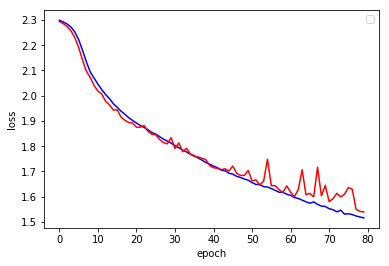

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()

final_train_counter = []
final_train_losses = []
final_test_counter = []
final_test_losses = []

for i in range(0, n_epochs):
    final_train_counter.append(i)
"""
for i in range(0, len(avg_train_loss)-1, 30):
    index = int(i/10)
    final_train_counter.append(train_counter[i])
    final_train_losses.append((train_losses[i] + train_losses[i+1]) / 2)
    final_test_counter.append(train_counter[i])
    final_test_losses.append((test_losses[i] + test_losses[i+1]) / 2)

final_train_counter.append(train_counter[len(train_counter)-1]) 
final_train_losses.append(train_losses[len(train_counter)-1])
final_test_counter.append(train_counter[len(train_counter)-1])
final_test_losses.append(test_losses[len(train_counter)-1])    
    
plt.plot(len(avg_train_loss)torch, avg_train_loss, color='blue')
plt.scatter(avg_train_loss[-1], avg_train_loss[-1], color='blue')
plt.plot(len(avg_test_losses), avg_test_losses, color='red')
plt.scatter(avg_test_losses[-1], avg_test_losses[-1], color='red')

# print(len(test_counter))
# print(len(test_losses))

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
"""

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(final_train_counter[:80], avg_train_loss[:80], color='blue')
#plt.scatter(final_train_counter[-1], avg_train_loss[-1], color='blue')
plt.plot(final_train_counter[:80], avg_test_loss[:80], color='red')
#plt.scatter(final_train_counter[-1], avg_test_loss[-1], color='red')
#plt.plot(final_train_counter, test_accuracy_list, color='red')

Text(0, 0.5, 'accuracy')

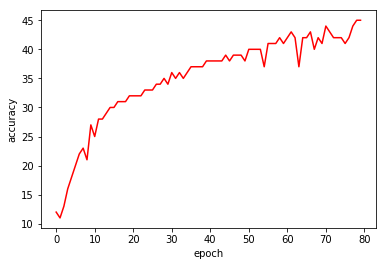

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()

last_acc = []
last_counter = []
index = 0
for acc in range(0, 80) :
    last_acc.append(test_accuracy_list[acc])
    last_counter.append(final_train_counter[index])
    index = index + 1

plt.plot(last_counter, last_acc, color='red')

plt.xlabel('epoch')
plt.ylabel('accuracy')


In [18]:
import matplotlib.pyplot as plt
import plotter

acc1 = plotter.SavedAccuracy(name='cifar10_dropout_acc.pkl')
acc1.saveGraph(last_acc, last_counter)
#a, c = acc1.loadGraph()
#plt.plot(c, a, color='red')


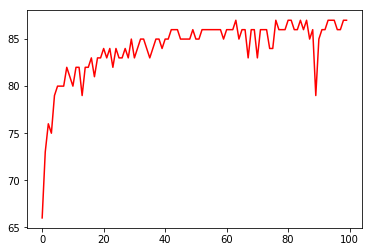

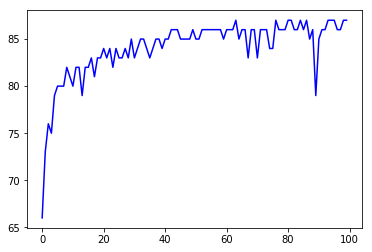

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


<Figure size 432x288 with 0 Axes>

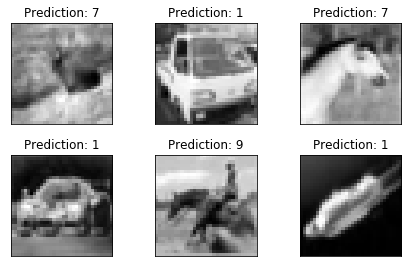

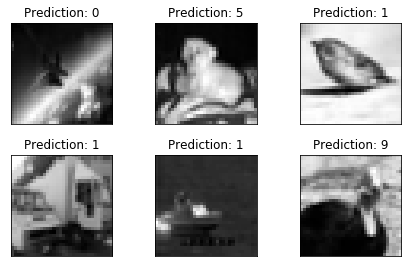

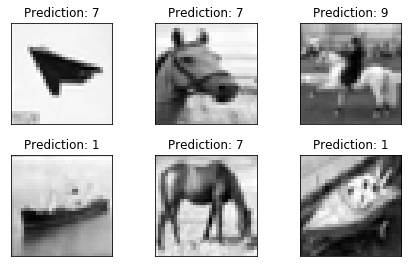

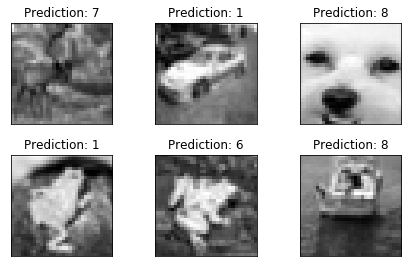

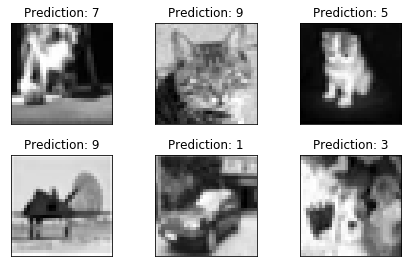

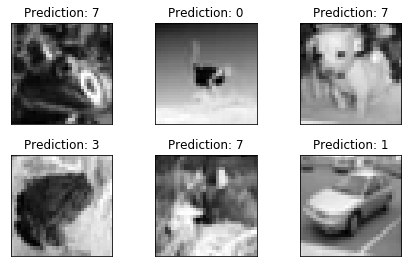

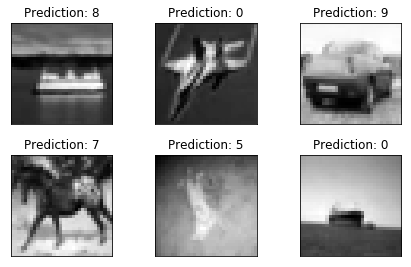

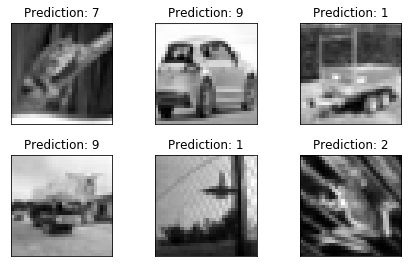

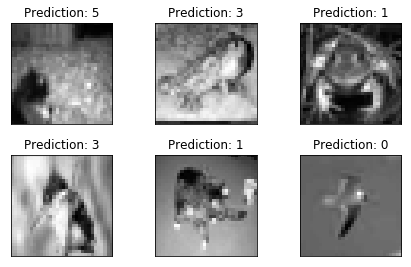

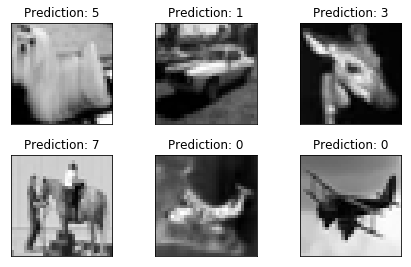

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
def makeCifar10Dec(param):
    if param == 0:
        return "airplane"
    elif param == 1:
        return "automobile"
    elif param == 2:
        return "bird"
    elif param == 3:
        return "cat"
    elif param == 4:
        return "deer"
    elif param == 5:
        return "dog"
    elif param == 6:
        return "frog"
    elif param == 7:
        return "horse"
    elif param == 8:
        return "ship"
    elif param == 9:
        return "truck"
    

examples = enumerate(test_loader)
for i in range(0, 10):
    batch_idx, (example_data, example_targets) = next(examples)
  
    with torch.no_grad():
        output = network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            plt.xticks([])
            plt.yticks([])


'\nimport matplotlib.pyplot as plt\n\ncontinued_network = Net()\ncontinued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,\n                                momentum=momentum)\n\nnetwork_state_dict = torch.load(\'./results/model.pth\')\ncontinued_network.load_state_dict(network_state_dict)\n\noptimizer_state_dict = torch.load(\'./results/optimizer.pth\')\ncontinued_optimizer.load_state_dict(optimizer_state_dict)\n\nexamples = enumerate(test_loader)\nfor i in range(0, 2):\n    batch_idx, (example_data, example_targets) = next(examples)\n\n    with torch.no_grad():\n        output = continued_network(example_data)\n\n        fig = plt.figure()\n        for i in range(6):\n            plt.subplot(2,3,i+1)\n            plt.tight_layout()\n            plt.imshow(example_data[i][0], cmap=\'gray\', interpolation=\'none\')\n            plt.title("Prediction: {}".format(\n                output.data.max(1, keepdim=True)[1][i].item()))\n            \n            plt.xticks

In [31]:
def test(epoch, graphOp, network):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        #for data, target in test_loader:
        iterator = iter(test_loader)
        data, target= iterator.next() 
        
        examples = enumerate(test_loader)
        batch_idx, (example_data, example_targets) = next(examples)  

        output = network(data)
        test_loss += F.nll_loss(output, target, size_average=False).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()

        test_loss /= batch_size_test
        test_losses.append(test_loss)
        test_counter.append((batch_idx*64) + ((epoch-1)*len(test_loader.dataset)))
        
        if graphOp == True:
          avg_test_loss.append(test_loss)
          test_accuracy_list.append(100. * correct / batch_size_test)
    
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, batch_size_test,
        100. * correct / batch_size_test))
   

In [32]:
# Reloading a already saved model

import matplotlib.pyplot as plt

continued_network = Net()
continued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,
                                momentum=momentum)

network_state_dict = torch.load('./results/mnist_with_linear_model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/mnist_with_linear_optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

test_accuracy_list = []
test_counter = []

for epoch in range(1, n_epochs + 1):
    test(epoch, True, continued_network)



/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test set: Avg. loss: 0.0676, Accuracy: 978/1000 (97%)

Test set: Avg. loss: 0.0921, Accuracy: 972/1000 (97%)

Test set: Avg. loss: 0.0931, Accuracy: 972/1000 (97%)

Test set: Avg. loss: 0.0916, Accuracy: 972/1000 (97%)

Test set: Avg. loss: 0.0659, Accuracy: 981/1000 (98%)

Test set: Avg. loss: 0.0729, Accuracy: 972/1000 (97%)

Test set: Avg. loss: 0.0784, Accuracy: 979/1000 (97%)

Test set: Avg. loss: 0.0542, Accuracy: 984/1000 (98%)

Test set: Avg. loss: 0.0768, Accuracy: 973/1000 (97%)

Test set: Avg. loss: 0.0614, Accuracy: 984/1000 (98%)

Test set: Avg. loss: 0.1344, Accuracy: 961/1000 (96%)

Test set: Avg. loss: 0.0864, Accuracy: 971/1000 (97%)

Test set: Avg. loss: 0.0807, Accuracy: 972/1000 (97%)

Test set: Avg. loss: 0.0939, Accuracy: 968/1000 (96%)

Test set: Avg. loss: 0.0704, Accuracy: 982/1000 (98%)

Test set: Avg. loss: 0.0951, Accuracy: 968/1000 (96%)

Test set: Avg. loss: 0.1026, Accuracy: 967/1000 (96%)

Test set: Avg. loss: 0.0728, Accuracy: 975/1000 (97%)

Test set: 

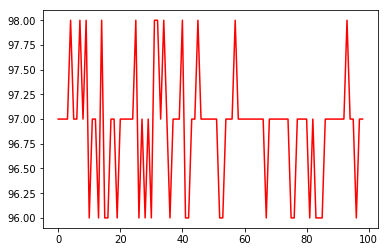

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure()

last_acc = []
last_counter = []
index = 0
for acc in range(0, len(test_accuracy_list)-1) :
  last_acc.append(test_accuracy_list[acc])
  last_counter.append(final_train_counter[index])
  index = index + 1

plt.plot(last_counter, last_acc, color='red')
